# BLOB REJECTION STUDIES

In [1]:
import csth.utils.photopeak_fit as pk

import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import matplotlib.patches  as patches
import matplotlib.gridspec as gridspec

from scipy                   import optimize
from scipy.integrate         import quad

In [2]:
# Plotting style
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
#plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 100

In [3]:
def plottext(res, cov, n):
    mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
    mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
    s, ss     = res.x[2], cov[2][2]**.5
    mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
    sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

    tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
            fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
            fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
            fr'$\sigma   = {sig} \pm {ssig}$' + '\n'+
            fr'Total Entries: {n}')
    return tres


def fitplot(E, res, cov, nbins):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    h,_,_ = ax.hist(E, bins=int(nbins), histtype='step', color='blue', linewidth=1);
    e = np.linspace(a, b, 1000)
    ax.plot(e, ((b-a)/nbins*len(E))*pk.pkpdf(e, res.x, [a,b]), c='black')

    ax.text(a, h.max()/2., s=plottext(res, cov, len(E)))

    ax.set_xlabel('Energy (pes)');
    ax.set_ylabel('Entries');

In [4]:
def W(E, x, lims):
    
    a, b = lims
    c, r = (a+b)/2., 1/(b-a)

    def fb(x):
        s = x[2]
        return s*(E-c) + r
    
    def fs(x):
        mu, sig = x[3], x[4]
        #A, _ = quad(gauss, a, b, args=(mu, sig))
        A = sig*(2*np.pi)**(1/2.)
        return (1/A)*gauss(E, mu, sig)
    
    def gauss(E, mu, sig):
        return np.e**(-(E-mu)**2/(2*sig**2))
    
    return fs(x)/(fs(x)+fb(x))

# DATA IMPORTATION

In [5]:
run = 6484
datadir = '/home/gonzalo/Documentos/NEXT/ICAROSNB/GDL/DATA'
data = pd.HDFStore(f'{datadir}/cepks_{run}_0000_11999_6q0min.h5')['/esum']

a, b = 410000, 445000
thds = data[(a<data['e'])&(data['e']<b)]

Radius = range(10, 21)
for R in Radius:
    ex = f'bl_{R} = pd.HDFStore(f"./blobdata/blobs3_{run}_{a}_{b}_radious{R}.h5")["/blobs"]'
    exec(ex)

## Th double scape fitting

In [6]:
E = thds['e'].values

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

res0 = res.x

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832


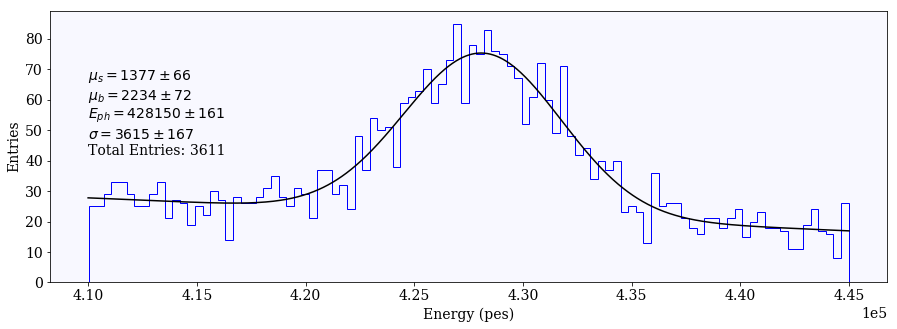

In [7]:
fitplot(E, res, cov, nbins)

In [8]:
w = W(E, res.x, [a, b])

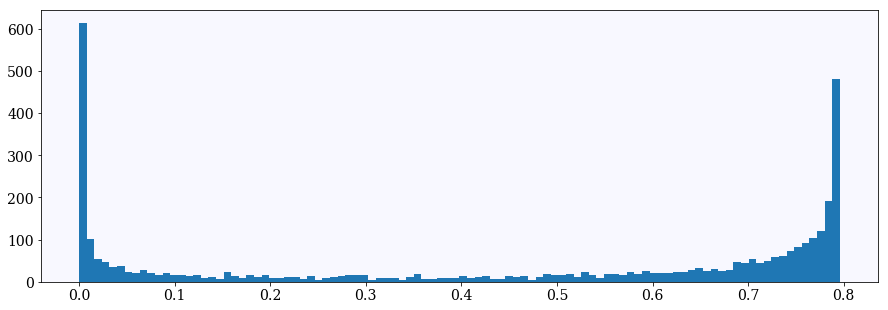

In [9]:
plt.hist(w, bins=nbins);

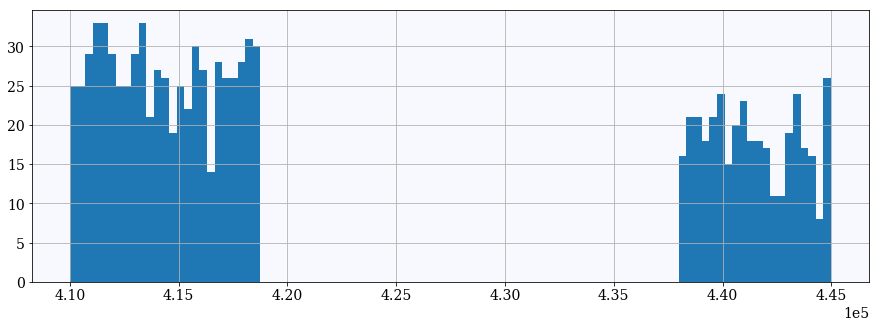

In [10]:
thds[w<0.1]['e'].hist(bins=nbins)

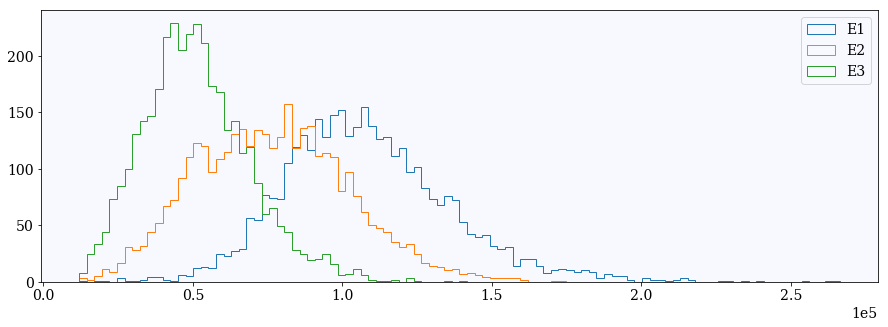

In [11]:
_, binedg =  np.histogram(bl_15['E1'], bins=nbins)

plt.hist(bl_15['E1'], bins=binedg, histtype='step', label='E1');
plt.hist(bl_15['E2'], bins=binedg, histtype='step', label='E2');
plt.hist(bl_15['E3'], bins=binedg, histtype='step', label='E3');

#plt.hist((bl_15['E3']+bl_15['E2'])/2., bins=binedg, histtype='step', label='(E3+E2)/2');

#E2 = bl_15['E2'].values
#E2m, E2s = np.mean(E2), np.std(E2)
#E2_thr = np.linspace(E2m-E2s, E2m+E2s, 20)
#plt.scatter(E2_thr, 10*np.ones(len(E2_thr)), c='r')
#plt.scatter(0.85e5, 120)

plt.legend();

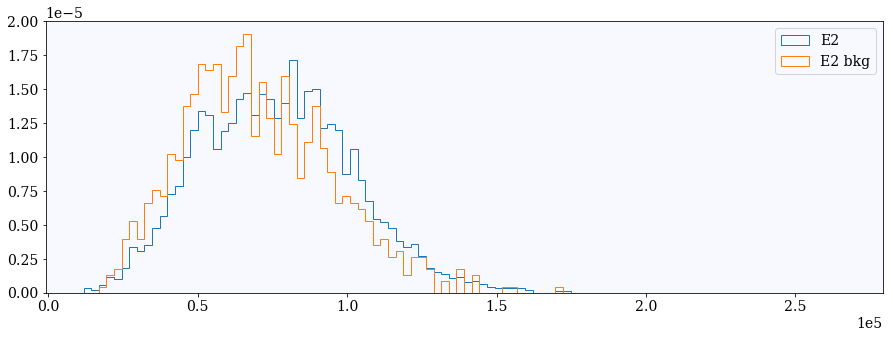

In [20]:
_, binedg =  np.histogram(bl_15['E1'], bins=nbins)

N = len(bl_15['E2'])

plt.hist(bl_15['E2']        , bins=binedg, histtype='step', label='E2'    , density=True);
plt.hist(bl_15[w<0.05]['E2'], bins=binedg, histtype='step', label='E2 bkg', density=True);

plt.legend();

In [12]:
thr = 0.85e5

sel = thds[(thr<bl_15['E1'])&(thr<bl_15['E2'])]['e'].values

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Optimization terminated successfully.
         Current function value: 13621.300072
         Iterations: 16
         Function evaluations: 1180


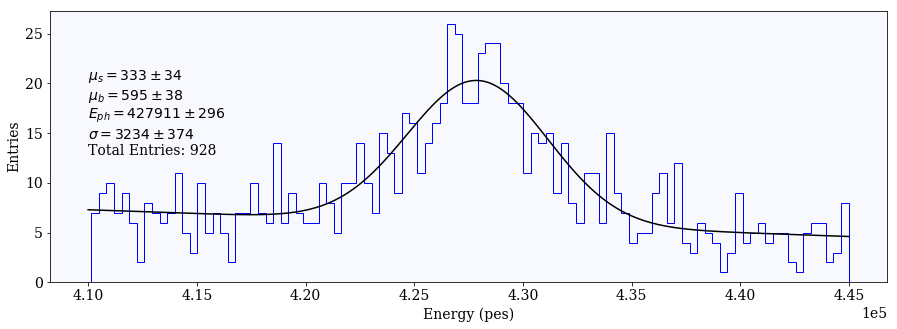

In [13]:
E=sel

x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)
    
fitplot(E, res, cov, nbins)

In [14]:
res0

array([ 1.37657619e+03,  2.23442393e+03, -3.96221084e-10,  4.28150389e+05,
        3.61538528e+03])

In [21]:
E2 = bl_15['E2'].values
E2m, E2s = np.mean(E2), np.std(E2)

E2_thr = np.linspace(E2m-2*E2s, E2m+2*E2s, 20)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690
Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690
Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690
Optimization terminated successfully.
         Current function value: 52874.642539
         Iterations: 16
         Function evaluations: 1904
Optimization terminated successfully.
         Current function value: 48918.217372
         Iterations: 14
         Function evaluations: 1491
Optimization terminated successfully.
         Current function value: 46406.494825
         Iterations: 15
         Function evaluations: 1798
Optimization terminated successfully.
         Current function value: 44290.008326
         Iterations: 17
         Function evaluation

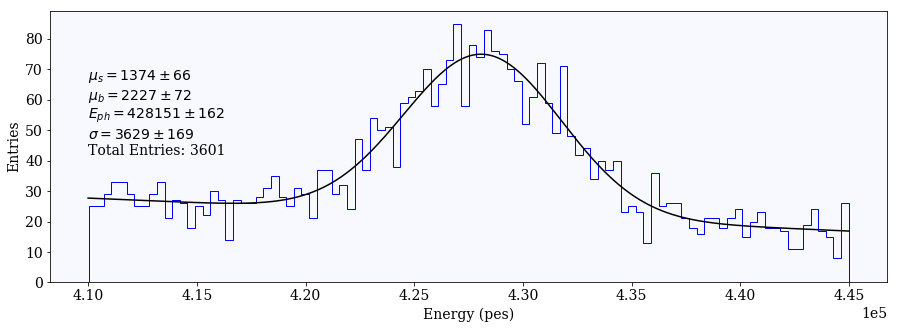

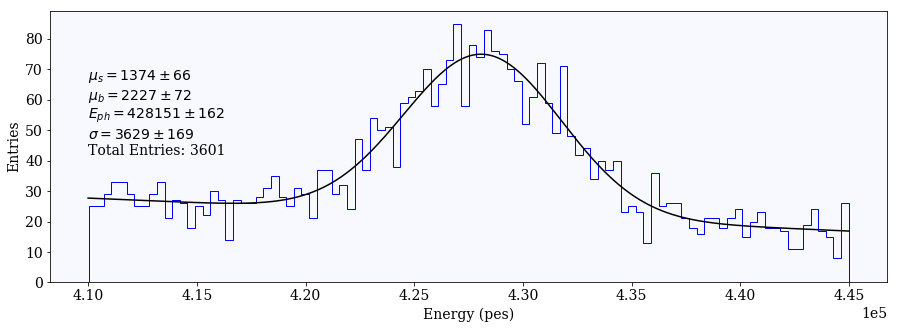

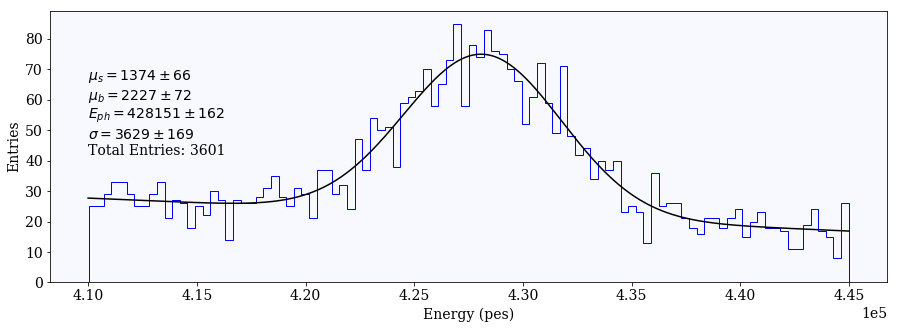

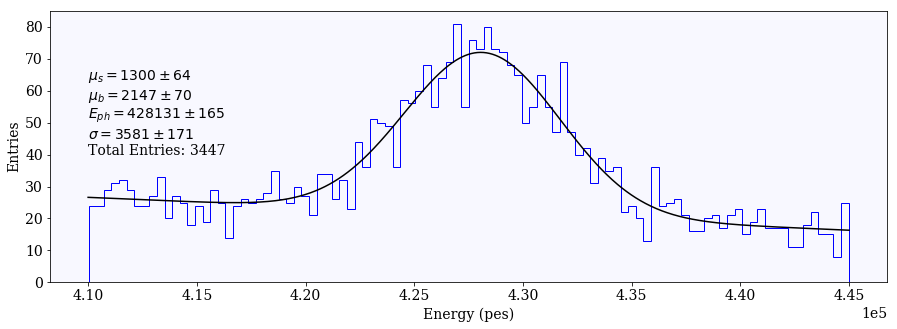

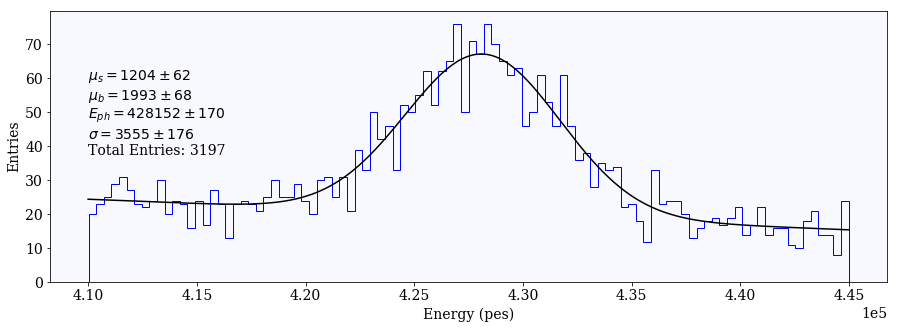

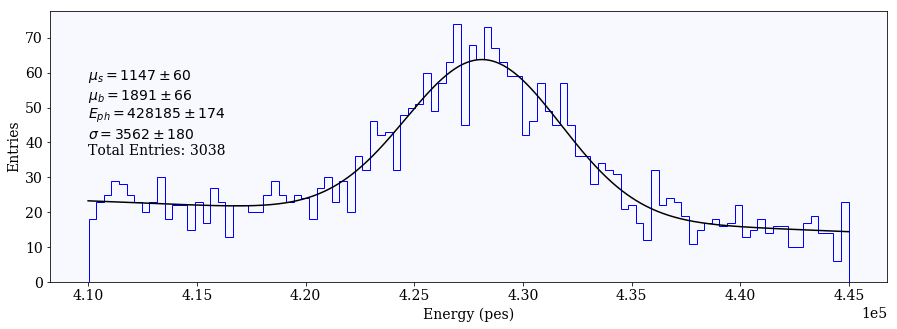

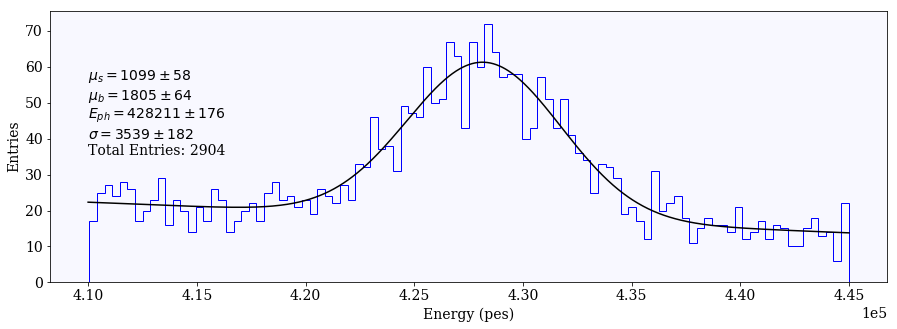

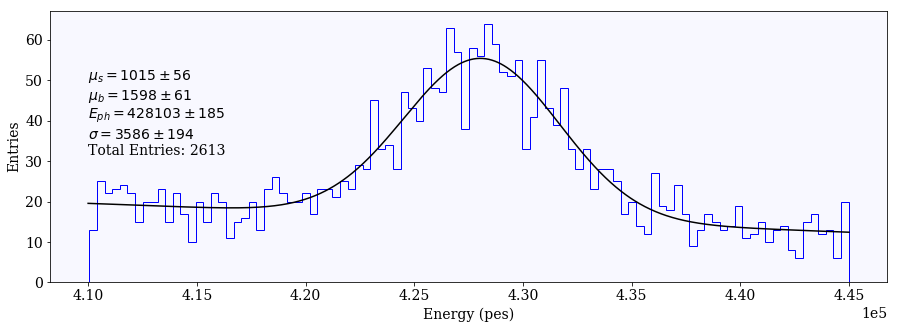

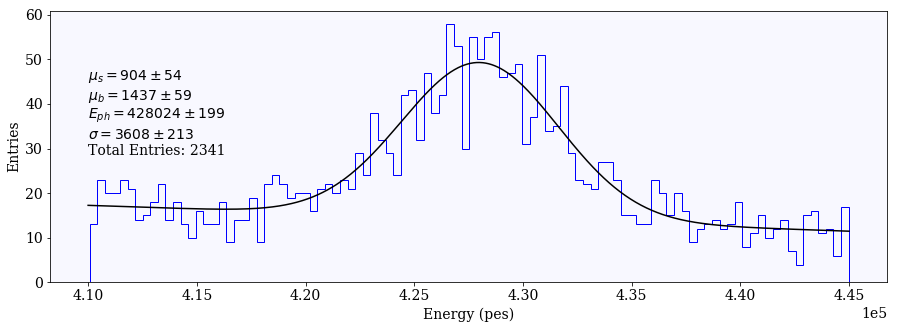

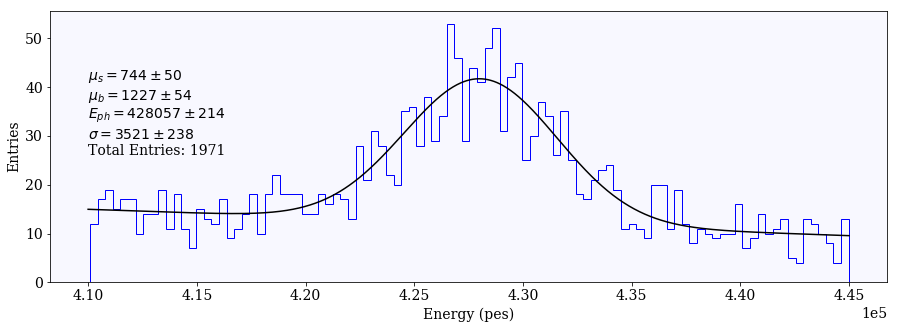

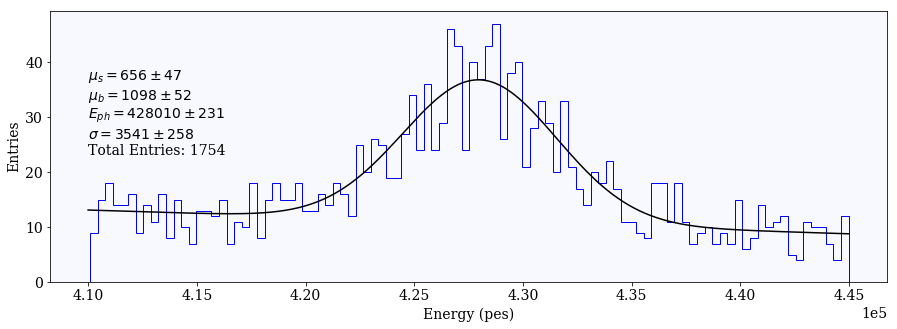

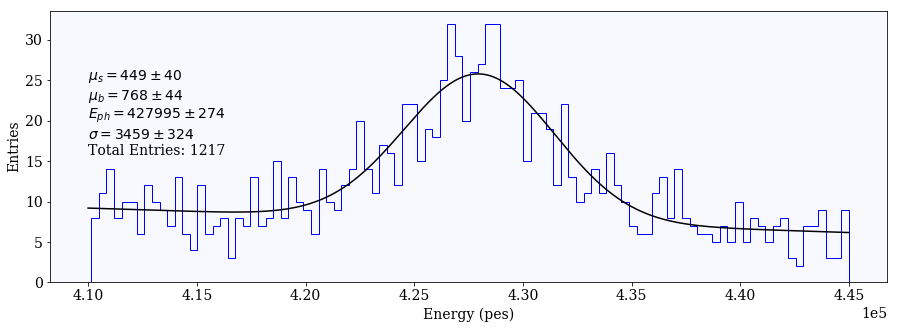

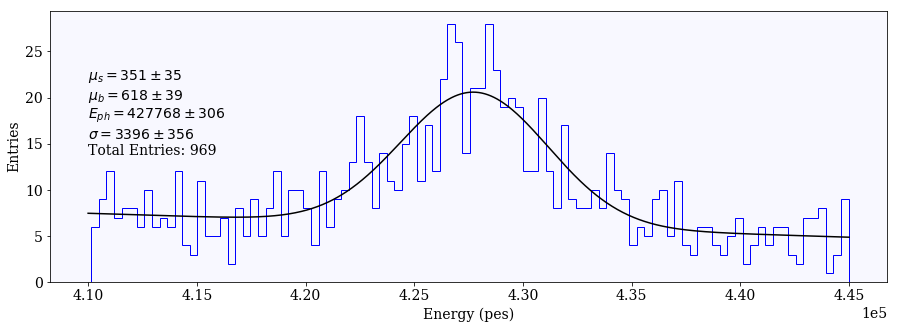

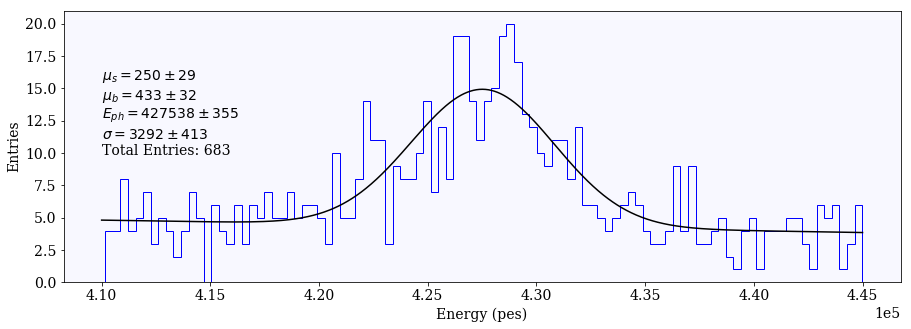

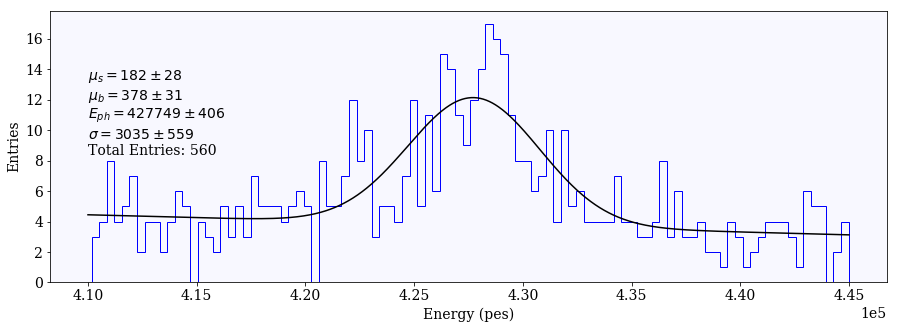

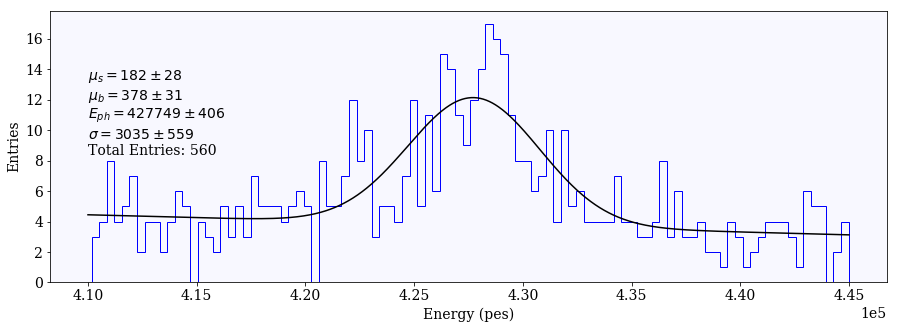

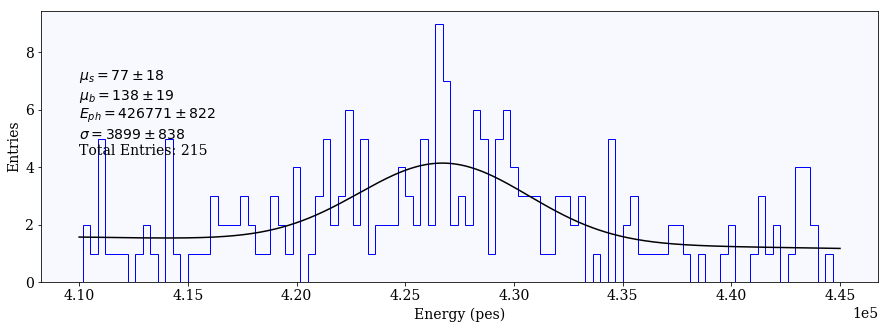

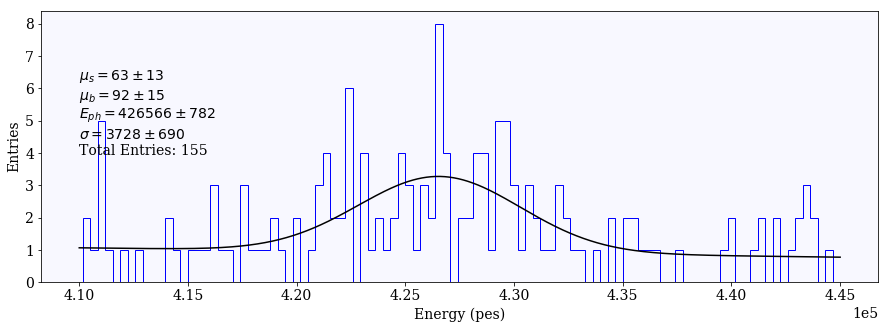

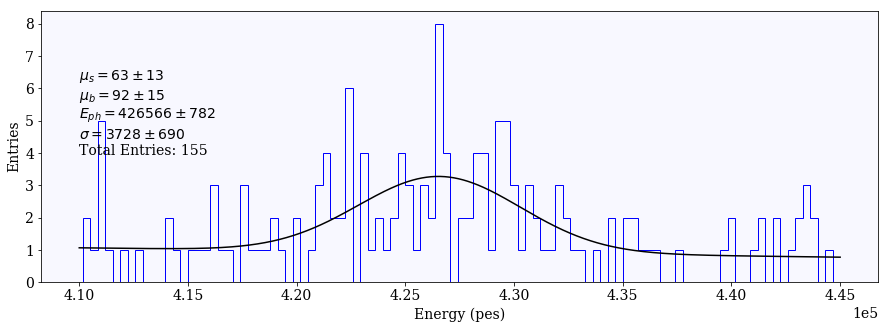

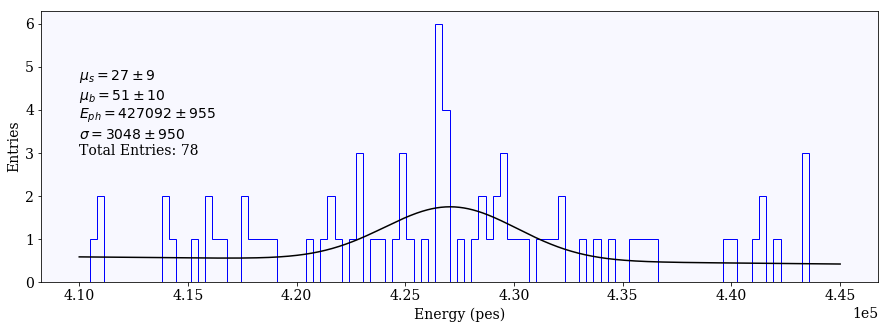

In [22]:
results=[]

for E2 in E2_thr:

    E = thds[bl_15['E2']>E2]['e'].values

    #fit 
    x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
    res, cov = pk.pkfit(E, [a,b], x0=x0)
    
    results.append(res.x)
    
    fitplot(E, res, cov, nbins)

In [24]:
mus = np.array(results)[:,0]
mub = np.array(results)[:,1]

mus0, mub0 = res0[0], res0[1]

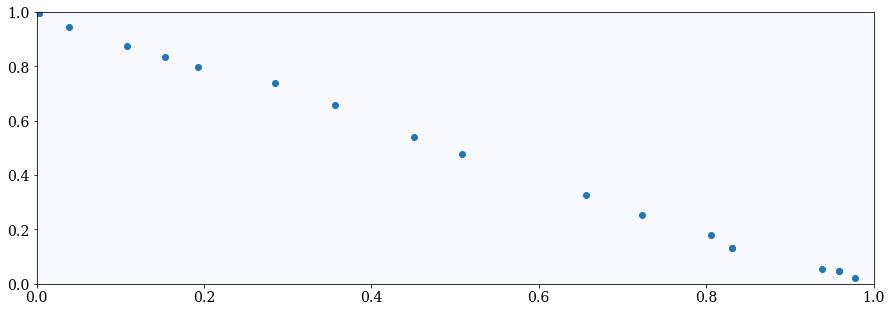

In [25]:
plt.scatter(1-mub/mub0, mus/mus0);
plt.xlim([0,1]);
plt.ylim([0,1]);

In [37]:
E = thds['e'].values

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

res0 = res.x

mus0, mub0 = res0[0], res0[1]
ms = (mus0+mub0)*mus0
mb = (mus0+mub0)*mub0

Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832
Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832
Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690
Optimization terminated successfully.
         Current function value: 55281.572386
         Iterations: 15
         Function evaluations: 1659
Optimization terminated successfully.
         Current function value: 55281.572386
         Iterations: 15
         Function evaluations: 1659
Optimization terminated successfully.
         Current function value: 47802.001606
         Iterations: 16
         Function evaluations: 1832
Optimization terminated successfully.
         Current function value: 44992.771333
         Iterations: 16
         Function evaluation

Optimization terminated successfully.
         Current function value: 980.568981
         Iterations: 14
         Function evaluations: 1185
Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832
Optimization terminated successfully.
         Current function value: 52142.090670
         Iterations: 18
         Function evaluations: 2158
Optimization terminated successfully.
         Current function value: 50429.831817
         Iterations: 15
         Function evaluations: 1728
Optimization terminated successfully.
         Current function value: 48292.309392
         Iterations: 16
         Function evaluations: 1786
Optimization terminated successfully.
         Current function value: 47283.606430
         Iterations: 16
         Function evaluations: 1904
Optimization terminated successfully.
         Current function value: 43127.539782
         Iterations: 17
         Function evaluations:

Optimization terminated successfully.
         Current function value: 2135.893286
         Iterations: 13
         Function evaluations: 1100
Optimization terminated successfully.
         Current function value: 2135.893286
         Iterations: 13
         Function evaluations: 1100
Optimization terminated successfully.
         Current function value: 1048.419827
         Iterations: 22
         Function evaluations: 1839
Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690
Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690
Optimization terminated successfully.
         Current function value: 54079.756501
         Iterations: 15
         Function evaluations: 1708
Optimization terminated successfully.
         Current function value: 51702.685161
         Iterations: 16
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 5829.536070
         Iterations: 16
         Function evaluations: 1262
Optimization terminated successfully.
         Current function value: 2192.851596
         Iterations: 14
         Function evaluations: 1567
Optimization terminated successfully.
         Current function value: 2164.346213
         Iterations: 69
         Function evaluations: 4100
Optimization terminated successfully.
         Current function value: 2164.346213
         Iterations: 69
         Function evaluations: 4100
Optimization terminated successfully.
         Current function value: 53.961060
         Iterations: 9
         Function evaluations: 1238
Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832
Optimization terminated successfully.
         Current function value: 55313.110122
         Iterations: 15
         Function evaluations: 1690


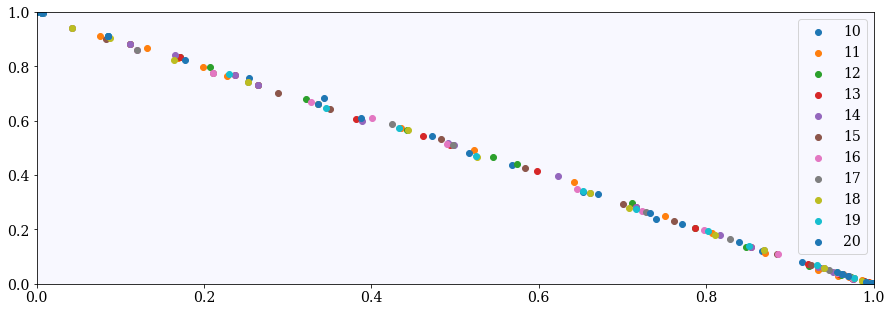

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

for R in range(10, 21):
    
    ex = f'E2 = bl_{R}["E2"].values'
    exec(ex)
    
    E2m, E2s = np.mean(E2), np.std(E2)
    E2_thr = np.linspace(E2m-2*E2s, E2m+2*E2s, 20)

    results=[]
    for E2 in E2_thr:
        ex = f'E = thds[bl_{R}["E2"]>E2]["e"].values'
        exec(ex)
        
        #fit 
        x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
        res, cov = pk.pkfit(E, [a,b], x0=x0)
    
        results.append(res.x)
    
    mus = np.array(results)[:,0]
    mub = np.array(results)[:,1]

    ax.scatter(1-(mus+mub)*mub/mb, (mus+mub)*mus/ms, label=f'{R}');
    
plt.legend()
plt.xlim([0,1]);
plt.ylim([0,1]);